# Proyecto #2 del Diplomado de Bioestadística: La obesidad modifica la asociación entre vitamina D y hormona paratiroidea

## Script en R
## Víctor Ariel Noriega Ortiz

### 1. Cargamos la base de datos

In [2]:
## Instrucciones para correr este programa:
## Este Script debe correrse en la carpeta que contenga el Script del Dr. Montoya, así como las carpetas 2003-2004 y
## 2005-2006. Si no está alguno de ellos, marcará error. 
## El correr esta linea de código, cargará automáticamente una variable BaseDatos, que es la que genera el programa de
## Dr. Montoya.
source('Prog01_JoseMontoyaConstruirBD.R')
require(stats)
require('ggplot2')
colnames(BaseDatos) <- make.unique(names(BaseDatos))
BaseDatos <- BaseDatos[BaseDatos$lbxpt21 <= 250,]

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### 2. Creamos dos variables: *hombres* y *mujeres*, la primera guardará todos los renglones de la base de datos que sean hombres, y mujeres lo análogo. También guardamos en vitaminaD_h los valores de vitaminaD para los hombres, y en vitaminaD_m los valores de vitamina D para mujeres

In [3]:
# Nos quedamos con todos los renglones donde el genero (riagendr) es igual a 1, osea es hombre
hombres <- BaseDatos[BaseDatos$riagendr == 1,]
# Hacemos lo análogo para mujeres.
mujeres <- BaseDatos[BaseDatos$riagendr == 2,]
# Obtenemos la vitamina D en hombres, y obtendremos la vitamina D en mujeres. Es decir, que nada más nos vamos a quedar
# con la columna "lbdvidms"
vitaminaD_h <- hombres$lbdvidms
vitaminaD_m <- mujeres$lbdvidms

### 3. Diagramas de caja y resúmenes de las variables.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.10   43.40   56.80   57.83   70.40  176.00    2579 

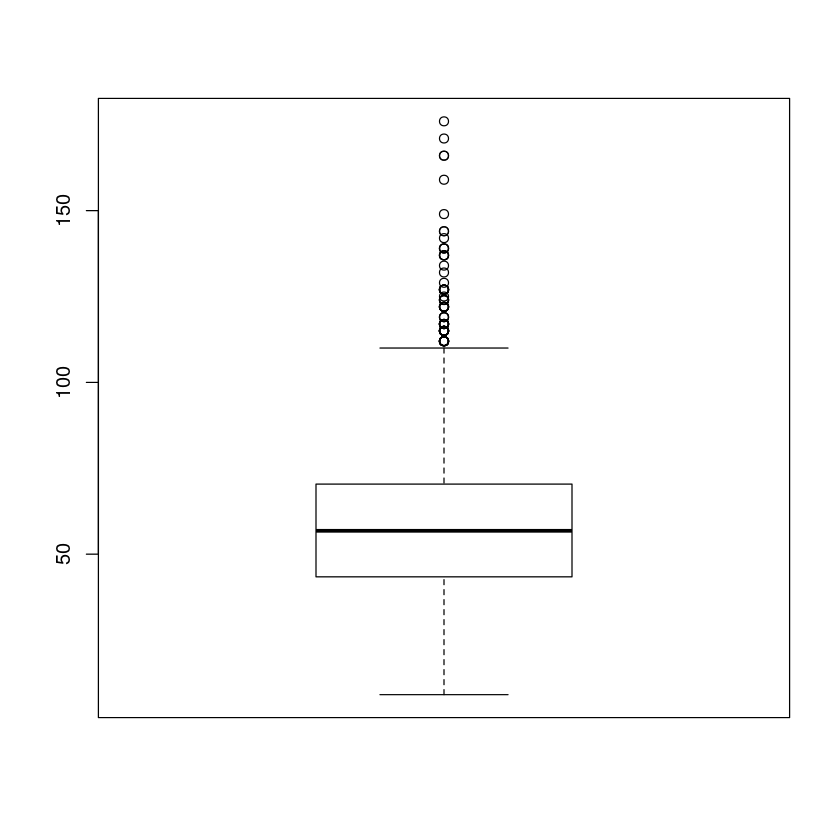

In [3]:
boxplot(vitaminaD_h)
summary(vitaminaD_h)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.10   39.80   54.40   56.86   70.40  198.00    2579 

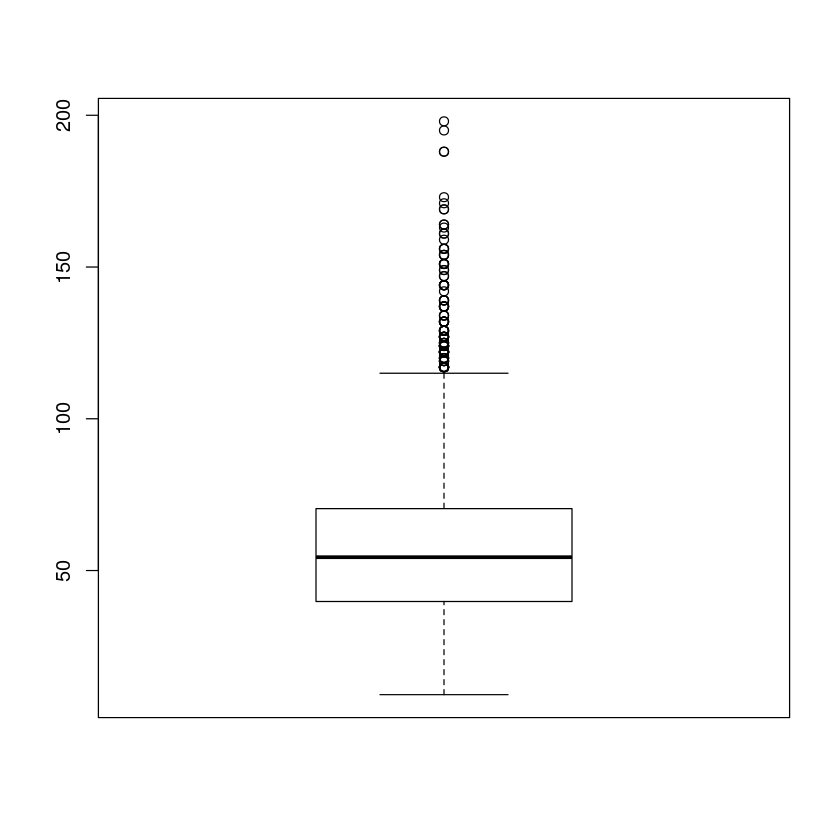

In [4]:
boxplot(vitaminaD_m)
summary(vitaminaD_m)

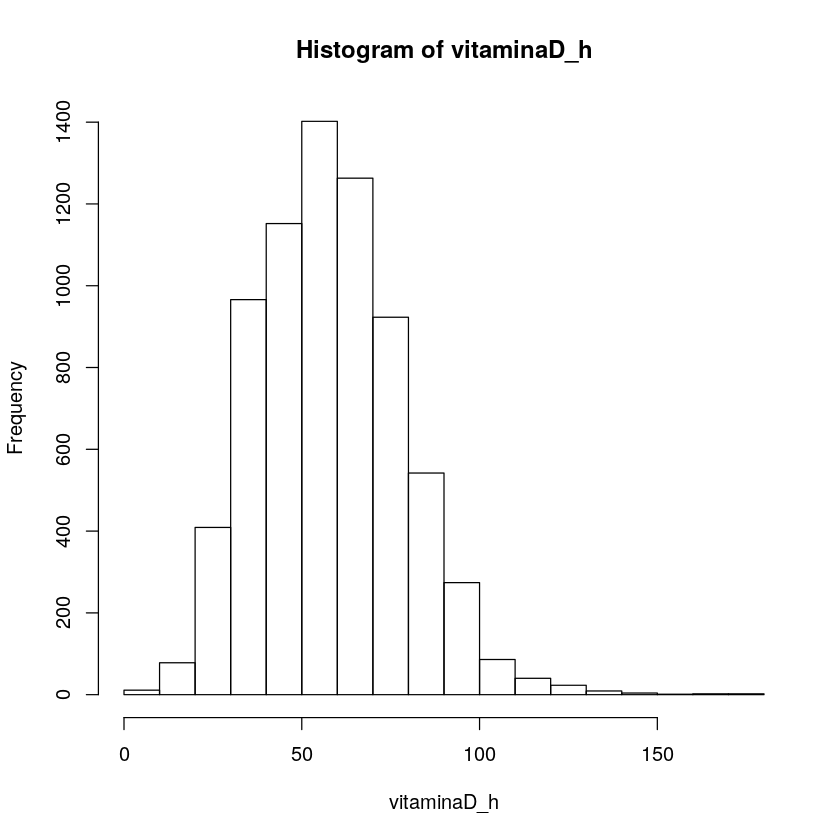

In [5]:
hist(vitaminaD_h)

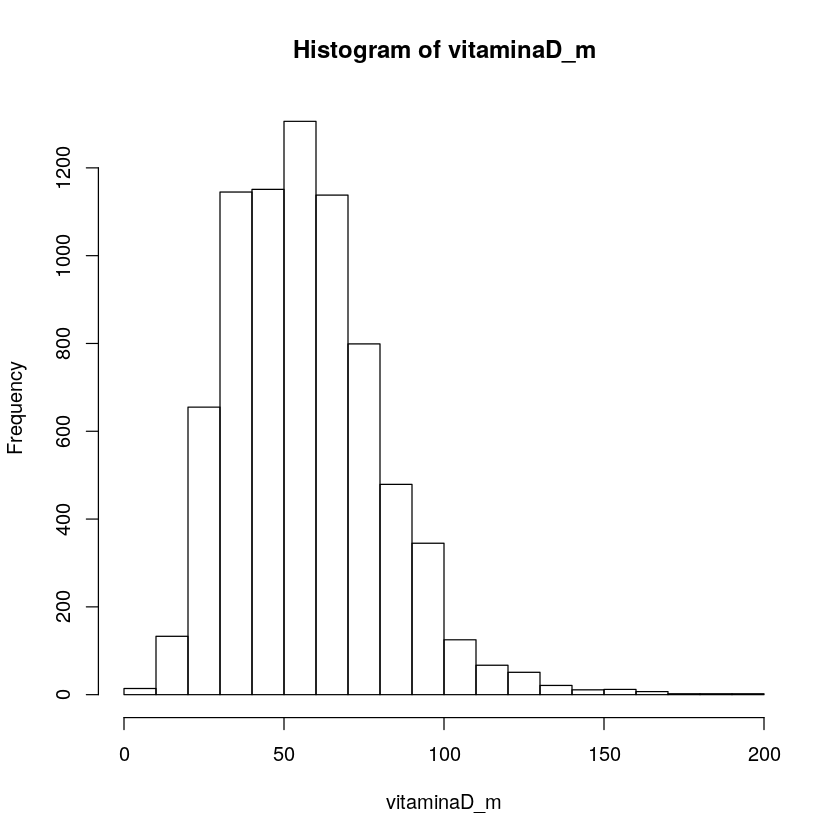

In [6]:
hist(vitaminaD_m)

### 4. Hacemos prueba de normalidad Shapiro para la distribucion de una muestra de 5,000 de la vitamina D para ambos sexos. 
Resultados: Negativo en ambos casos (no hay normalidad).

In [7]:
shapiro.test(sample(vitaminaD_h, 5000))
shapiro.test(sample(vitaminaD_m, 5000))


	Shapiro-Wilk normality test

data:  sample(vitaminaD_h, 5000)
W = 0.98208, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(vitaminaD_m, 5000)
W = 0.95896, p-value < 2.2e-16


### 5. Hacemos pruebas *t* con intervalos de confianza a 0.95 con la vitamina D en hombres y vitamina D en mujeres.

`Resultado: Se obtuvo evidencia estadística que rechaza que la media de vitamina D en hombres sea igual a la media de vitamina D en mujeres.`

In [8]:
t.test(vitaminaD_h, vitaminaD_m)


	Welch Two Sample t-test

data:  vitaminaD_h and vitaminaD_m
t = 2.6936, df = 14480, p-value = 0.007077
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.264075 1.675551
sample estimates:
mean of x mean of y 
 57.83113  56.86131 


In [9]:
myvars <- names(hombres) %in% c("ridexmon", "lbdvidms")
vitaminaD_h_1 <- hombres[myvars]
vitaminaD_h_1 <- vitaminaD_h_1[vitaminaD_h_1$ridexmon == 1,]

vitaminaD_h_2 <- hombres[myvars]
vitaminaD_h_2 <- vitaminaD_h_2[vitaminaD_h_2$ridexmon == 2,]

In [10]:
head(vitaminaD_h_1)
tail(vitaminaD_h_1)

,ridexmon,lbdvidms
,<int>,<dbl>
1,1,31.2
NA,NA,NA
12,1,58.1
NA.1,NA,NA
NA.2,NA,NA
22,1,40.9


,ridexmon,lbdvidms
,<int>,<dbl>
NA.2574,NA,NA
20450,1,73.8
20453,1,42.2
20454,1,44.7
20465,1,25.3
20467,1,42.2


In [11]:
head(vitaminaD_h_2)
tail(vitaminaD_h_2)

,ridexmon,lbdvidms
,<int>,<dbl>
4,2,70.4
5,2,72.9
8,2,45.9
NA,NA,NA
11,2,36.0
NA.1,NA,NA


,ridexmon,lbdvidms
,<int>,<dbl>
NA.2574,NA,NA
20456,2,42.2
20457,2,49.5
20458,2,85.9
20468,2,95.6
20469,2,68.9


### 6. Nuevamente intervalos de confianza, ahora probaremos si la vitamina D de los hombres es igual considerando el semestre en el cual se realizó la muestra.

`Resultado: Se encontró evidencia estadística que muestra que la media de la vitamina D en el periodo de mayo-octubre difiere del resto del año en hombres`

In [12]:
t.test(vitaminaD_h_1$lbdvidms, vitaminaD_h_2$lbdvidms)


	Welch Two Sample t-test

data:  vitaminaD_h_1$lbdvidms and vitaminaD_h_2$lbdvidms
t = -17.369, df = 7168.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.965553 -7.147044
sample estimates:
mean of x mean of y 
 53.62643  61.68272 


### 6.1 Se hace lo equivalente para mujeres, obteniendo el mismo resultado.

In [13]:
myvars <- names(mujeres) %in% c("ridexmon", "lbdvidms")
vitaminaD_m_1 <- mujeres[myvars]
vitaminaD_m_1 <- vitaminaD_m_1[vitaminaD_m_1$ridexmon == 1,]

vitaminaD_m_2 <- mujeres[myvars]
vitaminaD_m_2 <- vitaminaD_m_2[vitaminaD_m_2$ridexmon == 2,]

In [14]:
t.test(vitaminaD_m_1$lbdvidms, vitaminaD_m_2$lbdvidms)


	Welch Two Sample t-test

data:  vitaminaD_m_1$lbdvidms and vitaminaD_m_2$lbdvidms
t = -19.7, df = 7353.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.37019  -9.31212
sample estimates:
mean of x mean of y 
 51.55151  61.89267 


### 7. Se considerará ahora la hormona paratiroidea, pues es también una variable muy importante de nuestro estudio. Primero, checaremos una posible normalidad (resultado: no es normal) y después compararemos si la media de hormona paratiroidea tiene la misma media en hombres y en mujeres

In [15]:
hormona_h <- hombres$lbxpt21
hormona_m <- mujeres$lbxpt21

shapiro.test(sample(hormona_h, 5000))
shapiro.test(sample(hormona_m, 5000))


	Shapiro-Wilk normality test

data:  sample(hormona_h, 5000)
W = 0.83745, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(hormona_m, 5000)
W = 0.83969, p-value < 2.2e-16


**Resultado: `La hormona paratiroidea tiene la misma media tanto en hombres como en mujeres según esta base de datos`**

In [16]:
t.test(hormona_h, hormona_m)


	Welch Two Sample t-test

data:  hormona_h and hormona_m
t = 0.41552, df = 14652, p-value = 0.6778
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5765187  0.8867019
sample estimates:
mean of x mean of y 
 43.19187  43.03678 


In [17]:
myvars <- names(hombres) %in% c("dmdhrbrn", "lbdvidms")
vitD_h_Pais <- hombres[myvars]
vitD_h_M <- vitD_h_Pais[vitD_h_Pais$dmdhrbrn == 2,]
vitD_h_A <- vitD_h_Pais[vitD_h_Pais$dmdhrbrn == 1,]
tail(vitD_h_M)
tail(vitD_h_A)

,dmdhrbrn,lbdvidms
,<int>,<dbl>
NA.2774,NA,NA
NA.2775,NA,NA
NA.2776,NA,NA
20453,2,42.2
20454,2,44.7
20469,2,68.9


,dmdhrbrn,lbdvidms
,<int>,<dbl>
20450,1,73.8
20456,1,42.2
20457,1,49.5
20458,1,85.9
20465,1,25.3
20467,1,42.2


### 8. Se estudiará la diferencia de medias de vitamina D en hombres nacidos en México y hombres nacidos en América.

**Resultado: `Hay evidencia que podría mostrarnos una diferencia entre medias de vitamina D en los sujetos de interés`**

In [18]:
t.test(vitD_h_M$lbdvidms, vitD_h_A$lbdvidms)


	Welch Two Sample t-test

data:  vitD_h_M$lbdvidms and vitD_h_A$lbdvidms
t = -3.1912, df = 1815.6, p-value = 0.001441
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9648738 -0.7077523
sample estimates:
mean of x mean of y 
 56.63410  58.47041 


In [19]:
myvars <- names(mujeres) %in% c("dmdhrbrn", "lbdvidms")
vitD_m_Pais <- mujeres[myvars]
vitD_m_M <- vitD_m_Pais[vitD_m_Pais$dmdhrbrn == 2,]
vitD_m_A <- vitD_m_Pais[vitD_m_Pais$dmdhrbrn == 1,]
tail(vitD_m_M)
tail(vitD_m_A)

,dmdhrbrn,lbdvidms
,<int>,<dbl>
NA.2814,NA,NA
20441,2,37.5
NA.2815,NA,NA
NA.2816,NA,NA
20463,2,32.6
NA.2817,NA,NA


,dmdhrbrn,lbdvidms
,<int>,<dbl>
20455,1,66.5
20460,1,51.9
20461,1,30.2
20462,1,64.1
20464,1,61.6
NA.2817,NA,NA


### 8.2 Se estudiará lo mismo que en el caso 8, pero ahora considerando mujeres.

**Resultado: `Hay evidencia estadística que muestra una diferencia de medias entre mujeres nacidas y no nacidas en México en cuanto a sus niveles de vitamina D`.**

In [20]:
t.test(vitD_m_M$lbdvidms, vitD_m_A$lbdvidms)


	Welch Two Sample t-test

data:  vitD_m_M$lbdvidms and vitD_m_A$lbdvidms
t = -9.3139, df = 2022.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.933627 -4.521598
sample estimates:
mean of x mean of y 
 52.36142  58.08903 


In [21]:
myvars <- names(mujeres) %in% c("dmdhrbrn", "lbxpt21")
horm_m_Pais <- mujeres[myvars]
horm_m_M <- horm_m_Pais[horm_m_Pais$dmdhrbrn == 2,]
horm_m_A <- horm_m_Pais[horm_m_Pais$dmdhrbrn == 1,]
tail(horm_m_M)
tail(horm_m_A)

,dmdhrbrn,lbxpt21
,<int>,<dbl>
NA.2814,NA,NA
20441,2,27
NA.2815,NA,NA
NA.2816,NA,NA
20463,2,64
NA.2817,NA,NA


,dmdhrbrn,lbxpt21
,<int>,<dbl>
20455,1,21
20460,1,39
20461,1,39
20462,1,25
20464,1,26
NA.2817,NA,NA


### 9. Se estudiará la hormona paratiroidea en mujeres nacidas y no nacidas en México.

**Resultado: `Se tiene evidencia de que la media de la hormona paratiroidea de las mujeres nacidas en México es la misma que el de las mujeres no nacidas en México`**

In [22]:
t.test(horm_m_M$lbxpt21, horm_m_A$lbxpt21)


	Welch Two Sample t-test

data:  horm_m_M$lbxpt21 and horm_m_A$lbxpt21
t = 0.61627, df = 1612.6, p-value = 0.5378
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9520523  1.8243901
sample estimates:
mean of x mean of y 
 43.35317  42.91700 


In [23]:
myvars <- names(hombres) %in% c("dmdhrbrn", "lbxpt21")
horm_h_Pais <- hombres[myvars]
horm_h_M <- horm_h_Pais[horm_h_Pais$dmdhrbrn == 2,]
horm_h_A <- horm_h_Pais[horm_h_Pais$dmdhrbrn == 1,]
tail(horm_h_M)
tail(horm_h_A)

,dmdhrbrn,lbxpt21
,<int>,<dbl>
NA.2774,NA,NA
NA.2775,NA,NA
NA.2776,NA,NA
20453,2,27
20454,2,51
20469,2,30


,dmdhrbrn,lbxpt21
,<int>,<dbl>
20450,1,35
20456,1,35
20457,1,86
20458,1,34
20465,1,74
20467,1,53


## 9.2 Se hace lo análogo al caso 9 pero ahora con hombres

**Resultados: `También cuentan con la misma media`**

t.test(horm_h_M$lbxpt21, horm_h_A$lbxpt21)

## 10. Análisis de un modelo predictivo
# A partir de la recomendación del Dr. Durazo de utilizar una regresión no lineal para analizar la relación hormona paratiroidea (variable dependiente) y la vitamina D (variable independiente) se aplicó:

\begin{equation*}
y   = a + (b - a) \cdot e^{-x \cdot e^{c}}
\end{equation*}

## donde $a$ representa la asíntota de la función, $b$ es la ordenada al origen y $c$ es la constante de la exponencial.

In [24]:
fm <- nls(lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc), data = BaseDatos)
summary(fm)


Formula: lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Asym 31.42389    1.02653   30.61   <2e-16 ***
R0   81.29120    2.60237   31.24   <2e-16 ***
lrc  -3.56718    0.08482  -42.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.64 on 14649 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 5.531e-06
  (2583 observations deleted due to missingness)


## Para encontrar los parametros utilizamos SSasymp, la cual implementa un algoritmo de descenso de gradiente para optimizar la función de costo (en este caso, Non-linear least squares) .

## El resultado fue:

$a = 31.42$

$b = 81.29$

$c = -3.567$

## 10.1 Una gráfica con los datos y con la curva de modelado.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2583 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2583 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2583 rows containing missing values (geom_point).”

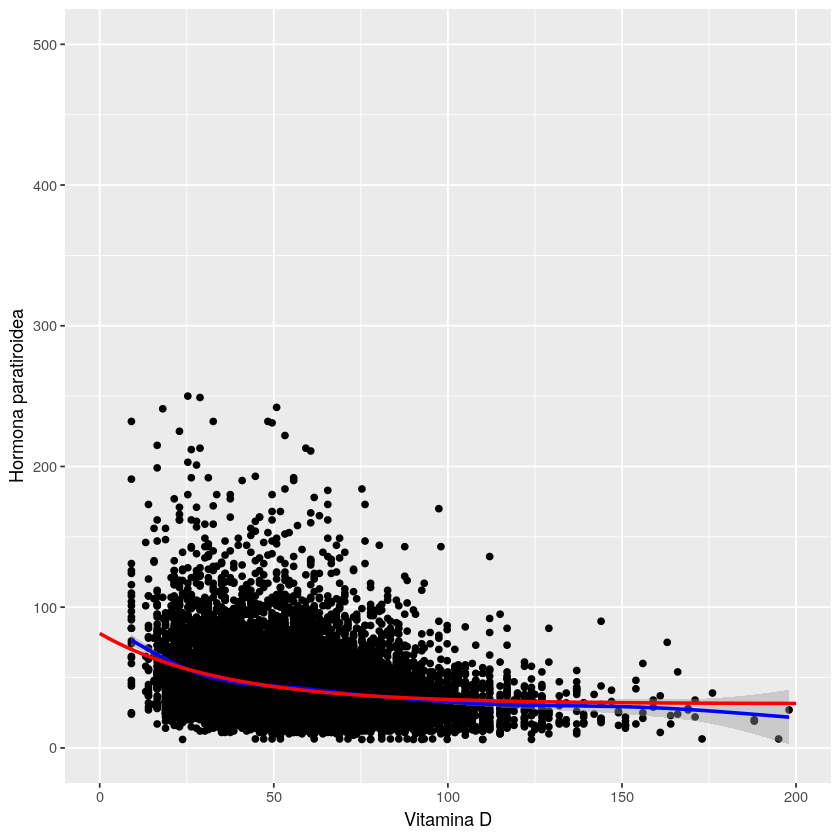

In [25]:
ggplot(data=BaseDatos, aes(x=lbdvidms, y=lbxpt21)) +
geom_point() +
geom_smooth(color="Blue", se=T) +
geom_smooth(method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="red", se=F, fullrange=T) +
scale_x_continuous(limits=c(0,200)) +
scale_y_continuous(limits=c(0, 500)) + 
xlab("Vitamina D") + ylab("Hormona paratiroidea")

## 10.2 Análisis predictivo para IMC >= 30

In [148]:
Obesos <- BaseDatos[BaseDatos$bmxbmi >= 30,]
Obesos <- Obesos[!is.na(Obesos$lbxpt21),]
Obesos <- Obesos[!is.na(Obesos$lbdvidms),]
fm1 <- nls(lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc), data = Obesos)
summary(fm1)


Formula: lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Asym  38.8919     1.5046   25.85   <2e-16 ***
R0    96.3873     7.6886   12.54   <2e-16 ***
lrc   -3.1742     0.1555  -20.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.1 on 3671 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 5.822e-06


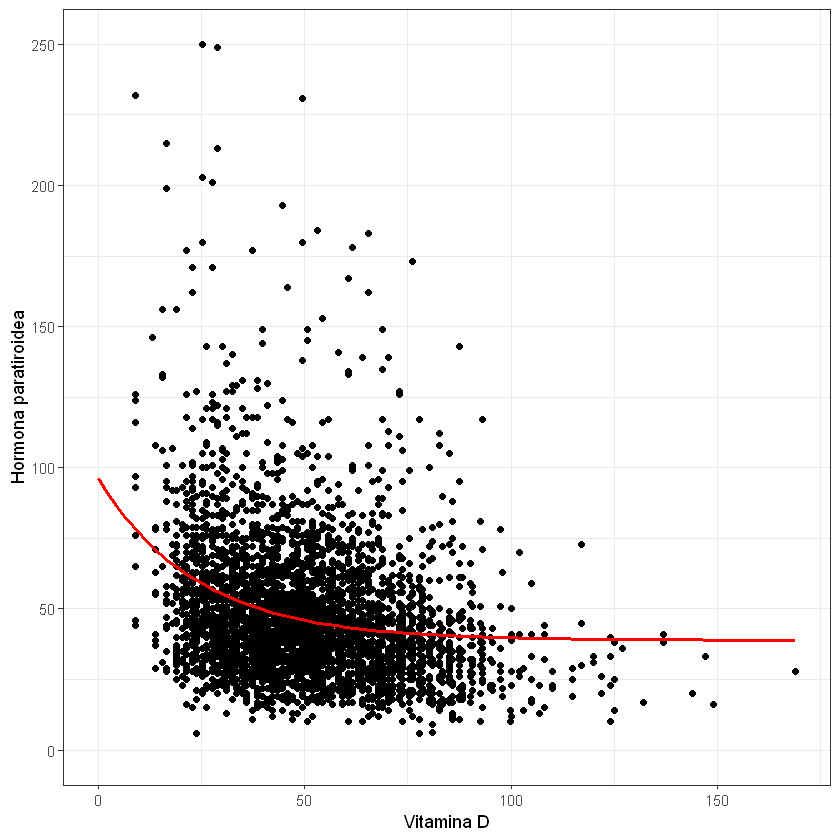

In [150]:
ggplot(data=Obesos, aes(x=lbdvidms, y=lbxpt21)) +
geom_point() +
geom_smooth(method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="red", se=F, fullrange=T) +
scale_x_continuous(limits=c(0,max(Obesos$lbdvidms))) +
scale_y_continuous(limits=c(0, max(Obesos$lbxpt21))) + 
xlab("Vitamina D") + ylab("Hormona paratiroidea")

## 10.3 Análisis predictivo con IMC < 30


Formula: lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Asym  30.5319     1.1816   25.84   <2e-16 ***
R0    76.0501     2.9420   25.85   <2e-16 ***
lrc   -3.6187     0.1054  -34.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.4 on 10784 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.597e-06


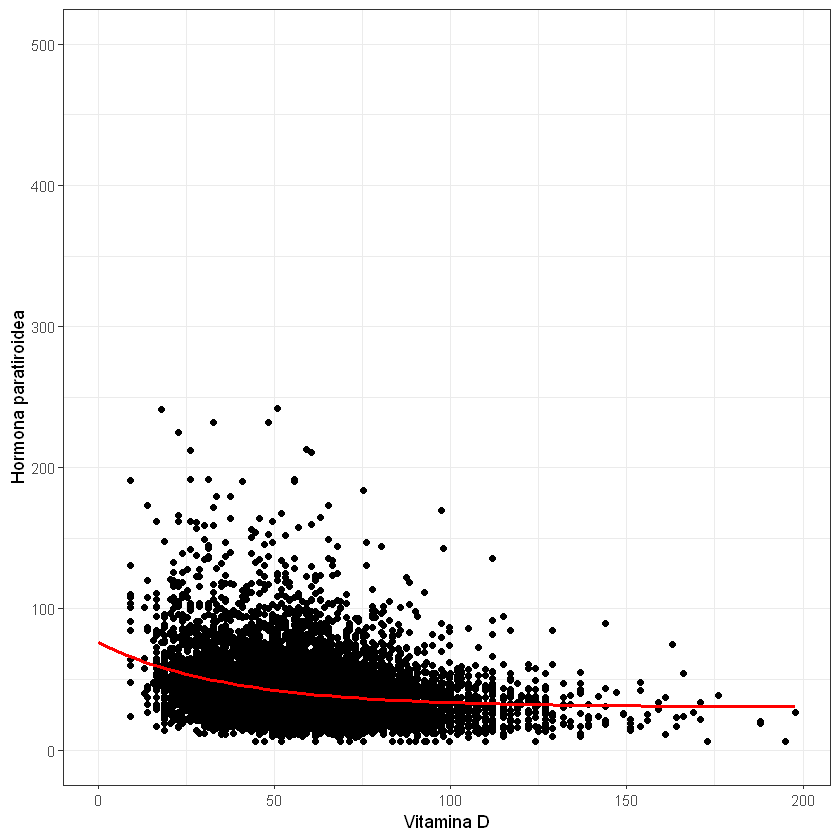

In [144]:
no_obesos <- BaseDatos[BaseDatos$bmxbmi < 30,]
no_obesos <- no_obesos[!is.na(no_obesos$lbxpt21),]
no_obesos <- no_obesos[!is.na(no_obesos$lbdvidms),]
fm <- nls(lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc), data = no_obesos)
summary(fm)
ggplot(data=no_obesos, aes(x=lbdvidms, y=lbxpt21)) +
geom_point() +
geom_smooth(method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="red", se=F, fullrange=T) +
scale_x_continuous(limits=c(0,max(no_obesos$lbdvidms))) +
scale_y_continuous(limits=c(0, 500)) + 
xlab("Vitamina D") + ylab("Hormona paratiroidea")

In [71]:
########### functions used for carry out the fit ########

## this function is avaible in: 
# http://www.leg.ufpr.br/~walmes/cursoR/ciaeear/as.lm.R   or in 
# https://gist.github.com/TonyLadson/2d63ca70eef92583001dece607127759 (from the line 269)

##### as.lm function:

as.lm <- function(object, ...) UseMethod("as.lm")

as.lm.nls <- function(object, ...) {
    if (!inherits(object, "nls")) {
        w <- paste("expected object of class nls but got object of class:", 
            paste(class(object), collapse = " "))
        warning(w)
    }

    gradient <- object$m$gradient()
    if (is.null(colnames(gradient))) {
        colnames(gradient) <- names(object$m$getPars())
    }

    response.name <- if (length(formula(object)) == 2) "0" else 
        as.character(formula(object)[[2]])

    lhs <- object$m$lhs()
    L <- data.frame(lhs, gradient)
    names(L)[1] <- response.name

    fo <- sprintf("%s ~ %s - 1", response.name, 
        paste(colnames(gradient), collapse = "+"))
    fo <- as.formula(fo, env = as.proto.list(L))

    do.call("lm", list(fo, offset = substitute(fitted(object))))

}

############## End as.lm function ####################

#### proto function avaible in https://github.com/hadley/proto/blob/master/R/proto.R

##### proto function:

proto <- function(. = parent.env(envir), expr = {},
                   envir = new.env(parent = parent.frame()), ...,
                   funEnvir = envir) {
  parent.env(envir) <- .
  envir <- as.proto.environment(envir)  # must do this before eval(...)
  # moved eval after for so that ... always done first
  # eval(substitute(eval(quote({ expr }))), envir)
  dots <- list(...); names <- names(dots)
  for (i in seq_along(dots)) {
    assign(names[i], dots[[i]], envir = envir)
    if (!identical(funEnvir, FALSE) && is.function(dots[[i]]))
      environment(envir[[names[i]]]) <- funEnvir
  }
  eval(substitute(eval(quote({
    expr
  }))), envir)
  if (length(dots))
    as.proto.environment(envir)
  else
    envir
}

#' @export
#' @rdname proto
as.proto <- function(x, ...) {
  UseMethod("as.proto")
}

#' @export
#' @rdname proto
as.proto.environment <- function(x, ...) {
  assign(".that", x, envir = x)
  assign(".super", parent.env(x), envir = x)
  structure(x, class = c("proto", "environment"))
}

#' @export
#' @rdname proto
as.proto.proto <- function(x, ...) {
  x
}
as.proto.list <- function(x, envir, parent, all.names = FALSE, ...,
                          funEnvir = envir, SELECT = function(x) TRUE) {
  if (missing(envir)) {
    if (missing(parent))
      parent <- parent.frame()
    envir <- if (is.proto(parent))
      parent$proto(...)
    else
      proto(parent, ...)
  }
  for (s in names(x))
    if (SELECT(x[[s]])) {
      assign(s, x[[s]], envir = envir)
      if (is.function(x[[s]]) && !identical(funEnvir, FALSE))
        environment(envir[[s]]) <- funEnvir
    }
  if (!missing(parent))
    parent.env(envir) <- parent
  as.proto.environment(envir)  # force refresh of .that and .super
}

Warning message:
"Removed 8 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 8 rows containing missing values (geom_point)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

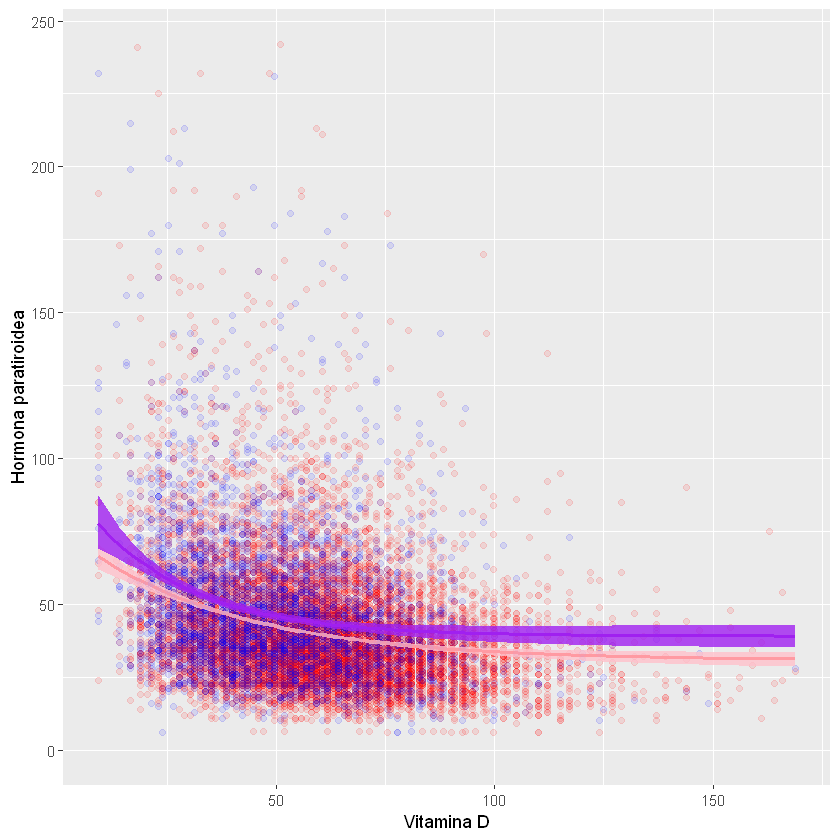

In [186]:
library(nls2)
theme_set(theme_gray())
fit1<-predict(as.lm.nls(fm), interval = "confidence", level = 0.99) 
no_obesos$lowerfit<-fit1[,2]
no_obesos$upperfit<-fit1[,3]

fit2 <- predict(as.lm.nls(fm1), interval = "confidence", level = 0.99)
Obesos$lowerfit<-fit2[,2]
Obesos$upperfit<-fit2[,3]

ggplot() +
geom_point(data=no_obesos, aes(x=lbdvidms, y=lbxpt21), color='red', alpha=0.1) +
geom_smooth(data=no_obesos, aes(x=lbdvidms, y=lbxpt21), method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="red", se=F, fullrange=T) +
geom_point(data=Obesos, aes(x=lbdvidms, y=lbxpt21), color='blue', alpha=0.1) +
geom_smooth(data=Obesos, aes(x=lbdvidms, y=lbxpt21), method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="purple", se=F, fullrange=T) +
scale_x_continuous(limits=c(min(no_obesos$lbdvidms),max(Obesos$lbdvidms))) +
scale_y_continuous(limits=c(0, max(no_obesos$lbxpt21))) + 
geom_ribbon(aes(x=lbdvidms,ymin=lowerfit,ymax=upperfit),data=no_obesos,alpha=0.8, fill='pink') +
geom_ribbon(aes(x=lbdvidms,ymin=lowerfit,ymax=upperfit),data=Obesos,alpha=0.8, fill='purple')+
xlab("Vitamina D") + ylab("Hormona paratiroidea")